In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def get(x):
    x = x[1:-1]
    x = x.replace("'", "")
    return x.split(',')

In [3]:
df = pd.read_csv('../data/abra_unwt_data.csv')
print(df.shape)

drop_l = list()
locs = list()
for i in df.index:
    l = df['locations'][i]
    l = get(l)

    if len(l) > 1:                  # Pick proteins that belong to only 1 location
        drop_l.append(i)
    else:
        locs.append(l[0])

df = df.drop(drop_l)
df['locations'] = locs
# df.to_csv('../data/plotting_data.csv', index=None)
len(df['locations'].unique())

(6154, 130)


27

In [4]:
cols = list(df.columns)
cols.remove('protein')
cols.remove('locations')

l = df.locations.unique()
loc2idx = {k: v for v, k in enumerate(l)}
df['location_id'] = df['locations'].apply(lambda x: loc2idx[x])

count_idx = dict()
for i in df.index:
    idx = df['location_id'][i]
    try:
        count_idx[idx] += 1
    except:
        count_idx[idx] = 1

count_idx

{0: 838,
 1: 389,
 2: 1636,
 3: 1886,
 4: 219,
 5: 530,
 6: 309,
 7: 24,
 8: 31,
 9: 2,
 10: 24,
 11: 15,
 12: 67,
 13: 31,
 14: 6,
 15: 4,
 16: 7,
 17: 39,
 18: 4,
 19: 29,
 20: 38,
 21: 9,
 22: 6,
 23: 6,
 24: 2,
 25: 1,
 26: 2}

In [5]:
loc2idx

{'Plasma membrane': 0,
 'Golgi apparatus': 1,
 'Cytosol': 2,
 'Nucleoplasm': 3,
 'Endoplasmic reticulum': 4,
 'Vesicles': 5,
 'Mitochondria': 6,
 'Focal adhesion sites': 7,
 'Intermediate filaments': 8,
 'Lysosomes': 9,
 'Centrosome': 10,
 'Nuclear membrane': 11,
 'Nuclear speckles': 12,
 'Microtubules': 13,
 'Centriolar satellite': 14,
 'Endosomes': 15,
 'Actin filaments': 16,
 'Nuclear bodies': 17,
 'Lipid droplets': 18,
 'Cell Junctions': 19,
 'Nucleoli': 20,
 'Peroxisomes': 21,
 'Nucleoli fibrillar center': 22,
 'Cytoplasmic bodies': 23,
 'Midbody': 24,
 'Midbody ring': 25,
 'Rods & Rings': 26}

In [6]:
ids = [0, 2, 3]

In [7]:
drop=list()
for i in df.index:
    if df['location_id'][i] not in ids:     # Pick top 4 locations
        drop.append(i)
df1 = df.drop(drop)
# df1 = df
df1.shape

(4360, 131)

In [18]:
import numpy as np
pca = PCA(n_components=0.9)
tsne = TSNE(perplexity=75, early_exaggeration=12, random_state=10, n_iter=700)

principle_comp = pca.fit_transform(df1[cols])
# df_new = df1[cols]
df_new = pd.DataFrame(data=principle_comp)
results = tsne.fit_transform(df_new)

varsum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
len(varsum)

21

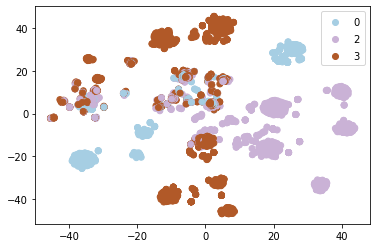

In [20]:
scatter = plt.scatter(results[:,0], results[:,1], c=df1['location_id'], cmap='Paired')
plt.legend(*scatter.legend_elements())
plt.savefig('../PCN_node2vec_unweighted.png')
plt.show()